# Swaps

## Economía Financiera

### 1. Objetivos

* Definir y clasificar los swaps como compromisos firmes de intercambio de flujos de caja futuros, comprendiendo su valor inicial nulo y la evolución de su MTM.

* Analizar en profundidad los principales tipos de swaps: 
    - Interest Rate Swaps
    - Cross Currency Swaps
    - Total Return Swaps
    - Cross Default Swaps

* Exponer las metodologías de pricing y valoración bajo un marco multicurva, incluyendo curvas cero cupón, tasas forward implícitas, bootstrapping, y ajustes XVA (CVA, DVA, FVA).

* Aplicar ejemplos prácticos y casos de uso corporativos e institucionales, resolviendo paso a paso cálculos de flujos, tasas de swap y MTM.



### 2. Características Principales y Casos de Uso


#### Definición

Un swap es un contrato OTC mediante el cual dos contrapartes se obligan a intercambiar una serie de flujos de caja (Generalmente uno fijo y otro flotante o variable) en fecha futura sobre un nocional teórico que no se intercambia.

Una pata (side) paga flujos variables referenciados a un Market Reference Rate (MRR), que se reinicia cada periodo, mientras la otra paga un tipo fijo o variable distinto. Al inicio, el valor *valuation* del swap es cero por definición (ignora costos de transacción y crédito), y conforme cambian las curvas de tipos y avanza el tiempo, surge un MTM positivo para una parte y negativo para la contraparte.

Por ende el Swaps es un Contrato tipo **Forward Commitment**, que se transa **OTC**, y sigue un **Juego de Suma Cero** dado que en cada intercambio lo que gana una parte es lo que pierde la otra.


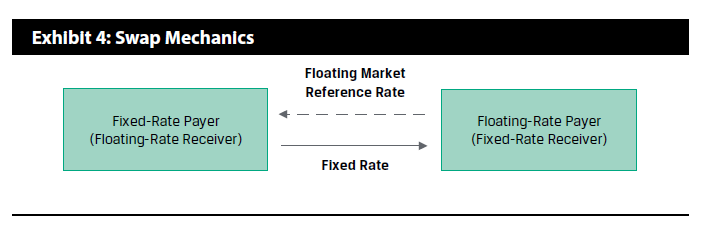


#### Swap vs. Forward: diferencia clave

* **Similitud:** valor inicial cero, symmetric payoff, no cash en inception.
* **Diferencia:** un swap tiene múltiples liquidaciones periódicas a tasa fija constante; una serie de FRAs tiene tasas distintas en cada periodo .


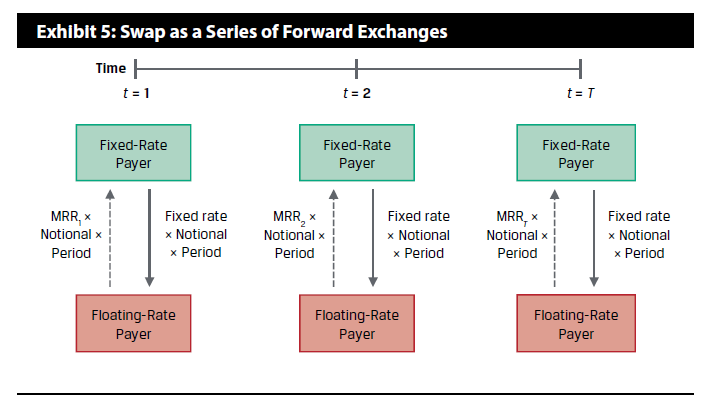


#### Casos de uso típicos:

* **Gestión de duración y perfil de riesgo de tipos:** gestores de renta fija ajustan duración sin compraventa directa de bonos. (Si tengo *Duration* negativo -*largo en bonos*- y espero que la tasa suba, puedo coberturarme a través de IRS sin vender la posición en bonos.)

* **Transformación de perfil de pasivos:** emisores convierten deuda flotante a fija (o viceversa) con matching de fechas de pago. (Tengo una deuda a 20 años a tasa flotante.)

* **Cobertura de riesgo cambiario e interés:** combinando CCS para financiación multimoneda y gestión simultánea de ambos riesgos. (Tengo deuda en USD, pero recibo flujos en pesos, puedo realizar un CCS para fijar la conversión entre monedas.)

* **Transferencia de riesgo de crédito:** inversores adquieren CDS para cubrir exposiciones a default de emisores. (Si espero que exista un default en algunos instrumentos puedo entrar en un CDS para realizar cobertura ante el riesgo de default. Por ejemplo en la película *The Big Short* se realizan CDS respecto a instrumentos CDO (Collateralized Debt) respecto al pago de sus cupones).

* **Arbitraje e implementación de curvas forward:** institucionales construyen posiciones implícitas equivalentes a series de FRAs.


### 3. Tipos de Swaps

| Tipo                                        | Subyacente                              | Flujos intercambiados                                                     | Particularidades cuantitativas                                                                                           |
| ------------------------------------------- | --------------------------------------- | ------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **Interest Rate Swap (IRS)**                | Tasa de interés en una divisa           | Fija vs. flotante (o flotante vs. flotante)                               | Par swap rate se obtienen descontando *forward* MRR; mayor liquidez en USD, EUR, GBP.                                    |
| **Cross-Currency Swap (CCS)**               | Tasa en dos divisas                     | Intercambio de nocionales y cupones en divisas distintas                  | Implica basis spread; se valoran dos curvas OIS + basis.                                                                 |
| **Credit Default Swap (CDS)**               | Riesgo de crédito de un emisor o índice | Prima periódica vs. pago contingente al default                           | Valoración via intensidades de default y probabilidades de supervivencia.                                                |
| **Total Return / Equity / Commodity Swaps** | Activos financieros o físicos           | Rendimiento total del activo vs. referencia (LIBOR, SOFR, etc.)           | Útiles en financiación sintética y transferencia de beta sectorial.                                                      |
| **Inflation Swaps, Variance Swaps**         | IPC, varianza                           | Fija vs. inflación realizada, o strike de varianza vs. varianza realizada | Pricing con modelos de inflación real y expectativas implícitas; para varianza se usa replicación estática con opciones. |




#### 1. Interest Rate Swap (IRS)

Intercambio de flujos fijos contra flotantes referenciados a una MRR (ej. LIBOR, EURIBOR). Se caracteriza por:

* **Par swap rate:** tipo fijo par $s_N$ que iguala el valor presente de los flujos fijos y flotantes.
* **Pago neto periódico:**

$$
\Delta CF_i = (\text{MRR}_i - s_N)\times \text{Notional}\times \Delta t_i
$$

* **No intercambio de principal:** solo se usan nocionales para cálculo.

**Ejemplo 1 (Swaps vs. Series de FRAs):**
Tres bonos cupón cero con tasas cero $z_1=2.396\%$, $z_2=3.4197\%$, $z_3=4.0005\%$ implican forward rates IFR0,1=2.396%, IFR1,1=4.4536%, IFR2,1=5.1719%. El swap de tres años con tasa fija constante $s_3=3.9641\%$ se obtiene resolviendo :

$$
\sum_{i=1}^3 \frac{\mathrm{IFR}_{i-1,1}}{(1+z_i)^i} = \sum_{i=1}^3 \frac{s_3}{(1+z_i)^i}
$$

#### 2. Cross-Currency Swap (CCS)

Intercambio de flujos en dos divisas distintas. Incluye:

* **Intercambio de nocionales inicial y final** (opcional) para cubrir riesgo monetario.
* **Patas fijas/flotantes en cada moneda**, referenciadas a MRR de cada divisa.
* **Casos de uso:** financiación corporativa en divisa extranjera, cobertura natural de ingresos y gastos .

#### 3. Credit Default Swap (CDS)

Seguro de crédito donde el comprador de protección paga un spread periódico y, ante un credit event (default, reestructuración), recibe compensación equivalente a la pérdida esperada del nocional menos recuperación .

* **Spread CDS:** tasa que iguala el valor presente de pagos periódicos y pago contingente.
* **Cálculo de prima:**   $\sum_{\tau}\frac{\text{Spread}\times\Delta \tau}{(1+r_\tau)^\tau}=\sum_{\tau}\frac{\text{LGD}\times \Pr(\text{default}_\tau)}{(1+r_\tau)^\tau}$.

#### 4. Commodity Swap

Intercambio de precio fijo versus spot de commodities (petróleo, gas, metales) para estabilizar costos o ingresos frente a volatilidad de precios.

#### 5. Total Return Swap (TRS)

Intercambio de la rentabilidad total (income + cambio en precio) de un activo subyacente contra un tipo fijo o flotante. Permite apalancamiento sintético de activos sin comprarlos directamente.


### 4. Métodos y mecánicas de Pricing y Valoración

1. **Curvas Cero Cupón y Bootstrapping:** obtenemos $z_i$ de precios de bonos, luego derivamos forwards con
   $(1+z_A)^A(1+\mathrm{IFR}_{A,B-A})^{B-A}=(1+z_B)^B$ .
2. **Par Swap Rate $s_N$:**

$$
\sum_{i=1}^{N}\frac{\mathrm{IFR}_{i-1,1}}{(1+z_i)^i} = \sum_{i=1}^{N}\frac{s_N}{(1+z_i)^i}
$$
3. **Valor de mercado (MTM) en t:**

   $$    V_t    = \underbrace{(\mathrm{MRR}_t - s_N)\,\text{Notional}\,\Delta t}_{\text{Liquidación corriente}}    + \sum_{i>t}\frac{(\mathrm{IFR}_{i-1,1}-s_N)\,\text{Notional}\,\Delta t}{(1+z_i)^{i-t}}    $$

4. **Descuento OIS vs. LIBOR:** tras la crisis de 2008, se usa curva OIS para descontar flujos y curva LIBOR/EURIBOR solo para proyectar MRR, incorporando márgenes crediticios.
5. **Ajustes XVA:**

   * **CVA (Credit Valuation Adjustment):** valor de contraparte, integra la probabilidad de default y exposición esperada.
   * **DVA (Debit Valuation Adjustment):** simétrico al CVA para el propio emisor.
   * **FVA (Funding Valuation Adjustment):** coste de financiación de colaterales.



### 5. Ejemplos y Casos de Uso

#### Ejemplo 1: Esterr Inc. “Swap to Fixed”

Esterr tiene un préstamo flotante CAD MRR + 150 bps a 3.5 años, pagadero trimestral. Entra en un IRS de CAD 250 M para **pagar** 2.05% fijo y **recibir** MRR trimestral. Los flujos combinados resultan en un coste de interés efectivo constante de 3.55% cada trimestre, evitando múltiples FRAs .


#### Ejemplo 2: Fyleton Investments

Fyleton recibe fijo 2.38% semestral sobre GBP 200 M vs. MRR semestral 0.71%. Primer pago semestral: GBP 1 670 000 = (2.38 %–0.71 %)×200 M×0.5. Si forward curve baja, como fixed receiver experimenta MTM ganancia; si sube, MTM pérdida .




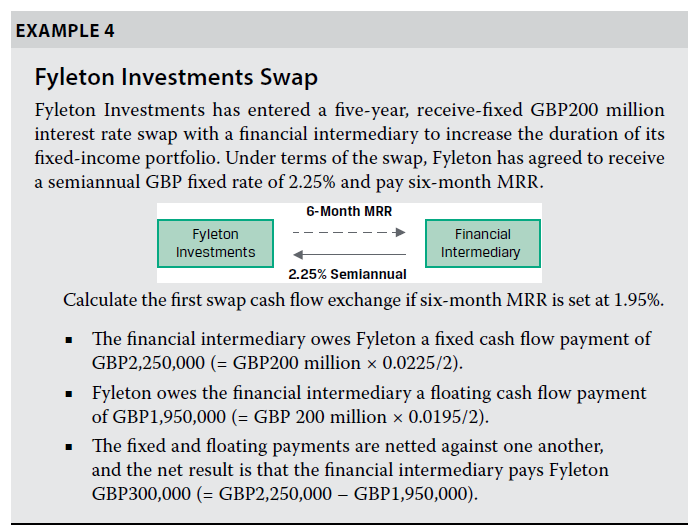


## Referencias Bibliográficas

* Brigo, D., & Mercurio, F. (2006). *Interest Rate Models – Theory and Practice*. Springer.
* Hull, J. C. (2018). *Options, Futures, and Other Derivatives* (10ª ed.). Pearson.
* CFA Institute. *Fixed-Income Trading and Strategies*, Level I Curriculum.


---